A time series that is decomposed shows us the individual fundamental components of a time series which help us understand the `trend`, `seasonality` and `noise` components. 

The decomposition can be modelled using `addtitve [Y(t) = T(t) + S(t) + R(t)]` or `multiplicative [Y(t) = T(t) × S(t) × R(t)]` model.

Importing [dataset](https://www.kaggle.com/datasets/podsyp/time-series-starter-dataset)

In [138]:
import pandas as pd
df = pd.read_csv("seasonal_time_series.csv")
df = df.dropna()
df['Period'] = pd.to_datetime(df['Period'],format="%d.%m.%Y")
df = df.set_index('Period')

<Axes: xlabel='Period'>

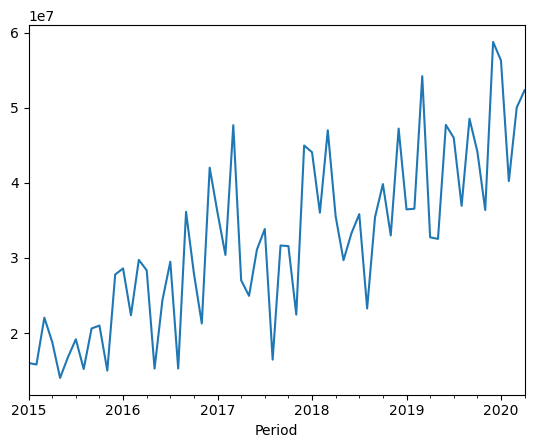

In [139]:
df['Revenue'].plot()

In [140]:
#Needed Library
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

Decomposing assuming `ADDITIVE` model

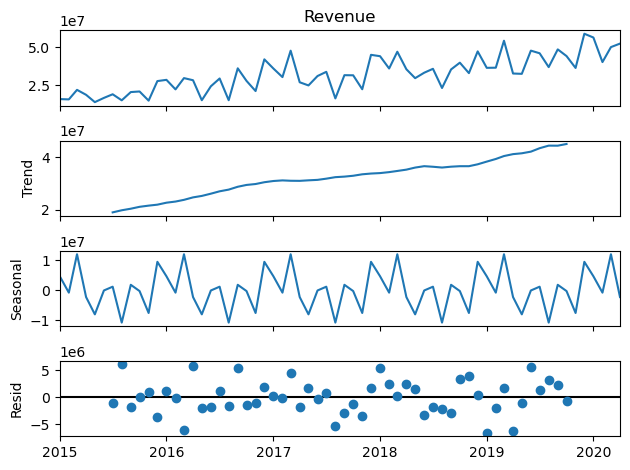

In [141]:
result = seasonal_decompose(df['Revenue'], model='additive', period=12)
result.plot()
plt.show()

Decomposing assuming `MULTIPLICATIVE` model

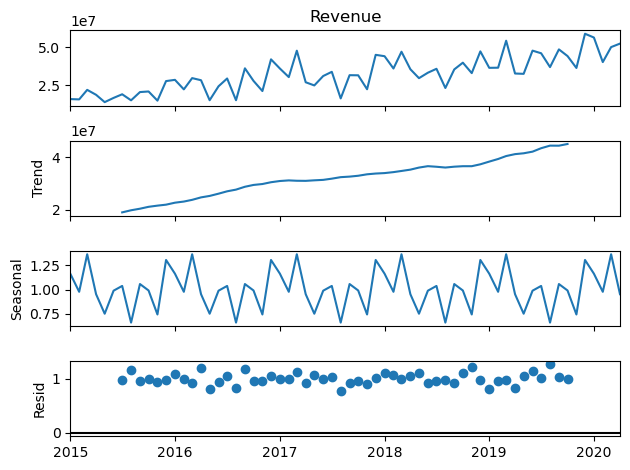

In [142]:
result = seasonal_decompose(df['Revenue'], model='multiplicative', period=12)
result.plot()
plt.show()

Residuals based on `ADDITIVE` model is distributed around 0 with constant variance unlike the residuals of `MULTIPLICATIVE` model that is distributed around 1. So, the `ADDITIVE` model captures the seasonality better. 

A better decomposition method for financial data is `Hodrick-Prescott Filter`

In [143]:
from statsmodels.tsa.filters.hp_filter import hpfilter

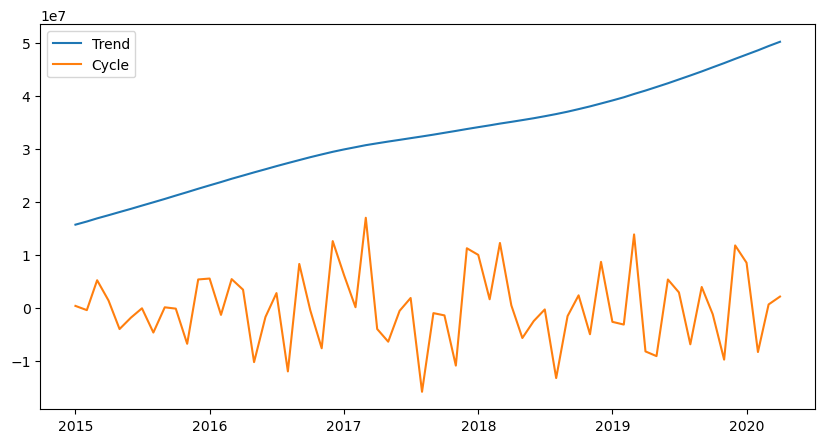

In [144]:
# Apply the Hodrick-Prescott filter
cycle, trend  = hpfilter(df['Revenue'], lamb=1600)  # 'lamb' is the smoothing parameter
# Plot the trend and cycle components
plt.figure(figsize=(10, 5))
plt.plot(trend, label='Trend')
plt.plot(cycle, label='Cycle')
plt.legend()
plt.show()

Below is a non-parametric way od seasonal decomposition which is called `LOESS` (Locally Estimated Scatterplot Smoothing)


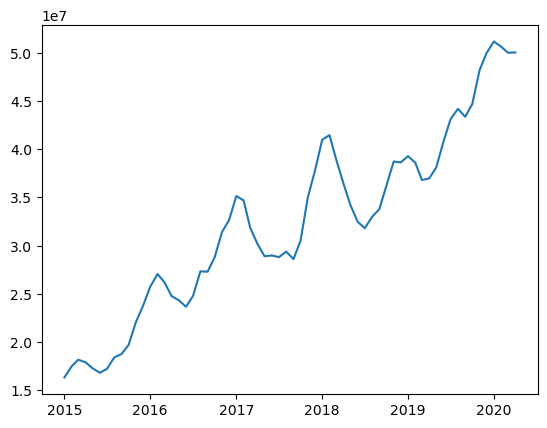

In [145]:
import statsmodels.api as sm
loess = sm.nonparametric.lowess(df['Revenue'], df.index, frac=0.1)
plt.plot(df.index, loess[:, 1], label='LOESS Smoothed')
plt.show()

The original `seasonal_decompose` type output using `LOESS` is shown below

In [146]:
from statsmodels.tsa.seasonal import STL

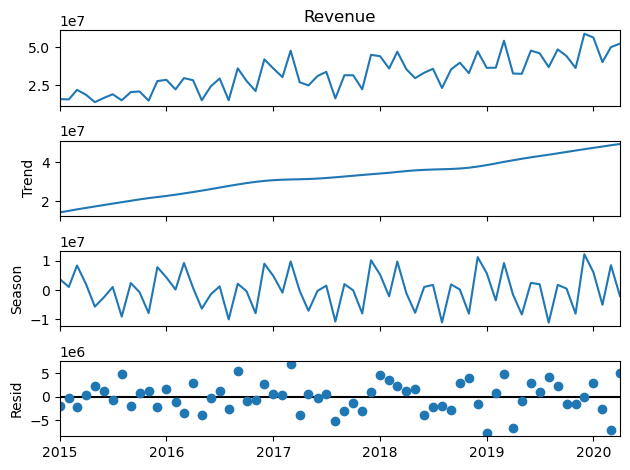

In [147]:
stl = STL(df['Revenue'], seasonal=13)
result = stl.fit()
result.plot()
plt.show()

Residuals can be used for `anomay detection` as the trend and seasonality components are removed

In [148]:
import numpy as np

Artificially creating outlier for demonstration

In [155]:
df.loc['2018-02-01','Revenue'] = 36020287.1553*4

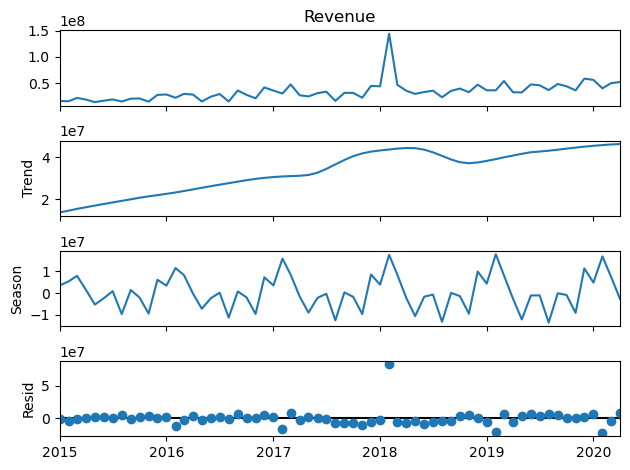

In [164]:
stl = STL(df['Revenue'], seasonal=13)
result = stl.fit()
result.plot()
plt.show()

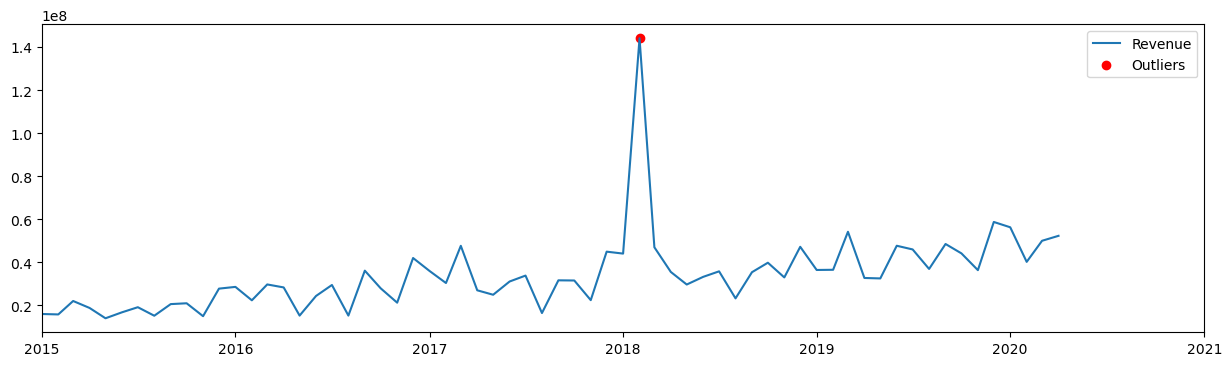

In [159]:

residuals = result.resid
# Identify outliers based on a threshold (e.g., 3 standard deviations from the mean)
threshold = 3 * np.std(residuals)
outliers = np.where(np.abs(residuals) > threshold)

plt.figure(figsize=(15, 4))
plt.plot(df['Revenue'], label='Revenue')
plt.scatter(df.iloc[outliers[0]].index[0], df['Revenue'].iloc[outliers], color='red', label='Outliers')
plt.legend()
plt.xlim('2015-01-01','2021-01-01')
plt.show()